# Starting Kit ~ Astrodatatón USM 2024
En este jupyter notebook proveemos a los participantes con un punto de partida para que puedan acceder a los datos, con el fin además de dar más claridad al problema a resolver durante la competencia.

## Imports básicos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

## Funciónes útiles

In [35]:
def plot_epsilon(epsilon) -> None:
    e1 = epsilon[0, :]
    e2 = epsilon[1, :]
    delta_e = epsilon[2, :]
    # Crear una figura con tres subplots
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    vmin = min(e1.min(), e2.min(), delta_e.min())
    vmax = max(e1.max(), e2.max(), delta_e.max())

    # Mostrar cada imagen en su subplot correspondiente
    cmap = 'viridis'  # Colormap azul-blanco-rojo

    im1 = axs[0].imshow(e1, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[0].set_title(r'$\epsilon_{1}$')

    im2 = axs[1].imshow(e2, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[1].set_title(r'$\epsilon_{2}$')

    im3 = axs[2].imshow(delta_e, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[2].set_title(r'$\Delta\epsilon$')

    # Añadir una barra de color
    cbar = fig.colorbar(im1, ax=axs, orientation='horizontal', fraction=0.02, pad=0.1)
    cbar.set_label(r'$\epsilon$')

    # Añadir un título global
    fig.suptitle('Imágenes de entrada para el problema', fontsize=14)

    # Mostrar la figura
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_kappa(kappa) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    cmap = 'viridis'
    im = ax.imshow(kappa, cmap=cmap, vmin=kappa.min(), vmax=kappa.max())
    ax.set_title('Imágen de salida esperada para el problema', fontsize=14)
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1)
    cbar.set_label(r'$\kappa$')
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
def plot_kappas(kappa_true,kappa_pred) -> None:
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    cmap = 'viridis'
    vmin = min(kappa_true.min(), kappa_pred.min())
    vmax = max(kappa_true.max(), kappa_pred.max())
    im_true = axs[0].imshow(kappa_true, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[0].set_title('True')
    im_true = axs[1].imshow(kappa_pred, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[1].set_title('pred')

    cbar = fig.colorbar(im_true, ax=axs, orientation='horizontal', fraction=0.02, pad=0.1)
    cbar.set_label(r'$\kappa$')
    fig.suptitle('Imágenes de salida para el problema', fontsize=14)
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Problema y Datos
El problema a resolver consiste en lograr generar los mapas de convergencia $\kappa$ a partir de las elipticidades $\epsilon_{1}$, $\epsilon_{2}$ y $\Delta\epsilon$ distorsionadas por el fenómeno de weak lensing.

En otras palabras tenemos un input de 3 imágenes de 128x128 y un output deseado de una imágen de 128x128.
A continuación les mostramos como descargar los datos y una breve visualización de un caso ejemplo.

Los datos consisten de 8 conjuntos de entrenamiento, cada uno con un peso de alrededor de 10GB descomprimidos, y un conjunto de validación también de alrededor de 10GB descomprimido. Dependerá de ustedes si quieren usar todos los conjuntos de entrenamiento o solo algunos, pero deben tener en cuenta que no hay datos repetidos entre conjuntos, estos son completamente independientes entre sí.

Para descargar los datos podemos usar el comando wget con el link de descarg correspondiente al conjunto deseado, en este ejemplo descargaremos el conjunto de entrenamiento 1:

In [ ]:
!wget https://descargas.inf.santiago.usm.cl/train/1.tar.gz

--2024-09-21 23:11:34--  https://descargas.inf.santiago.usm.cl/train/1.tar.gz
Resolving descargas.inf.santiago.usm.cl (descargas.inf.santiago.usm.cl)... 200.1.22.243
Connecting to descargas.inf.santiago.usm.cl (descargas.inf.santiago.usm.cl)|200.1.22.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8290301337 (7.7G) [application/octet-stream]
Saving to: ‘1.tar.gz’

1.tar.gz            100%[===================>]   7.72G  6.54MB/s    in 13m 6s  

2024-09-21 23:24:42 (10.1 MB/s) - ‘1.tar.gz’ saved [8290301337/8290301337]



Luego de la descarga tendrán un archivo comprimido, el cual puede ser descomprimido desde la terminal con el siguiente comando:
```
tar -xf file.tar.gz
```
Esto generará una carpeta que contendrá dos carpetas, una llamada EPSILON que contiene las imágenes de input en formato numpy con precisión float16 y otra llamada KAPPA que tiene la respuesta esperada para cada imágen también en formato numpy con precisión float16.

A continuación descomprimimos el archivo de ejemplo:

In [ ]:
!tar -xf 1.tar.gz

Luego podemos visualizar las imágenes cargandolas con numpy, para esto obtendremos la dirección de solo la primera imágen del conjunto 1.

Shape de imágen epsilon: (3, 128, 128) max: 1.1318359375 min: -1.2529296875
Shape de imágen kappa: (128, 128)


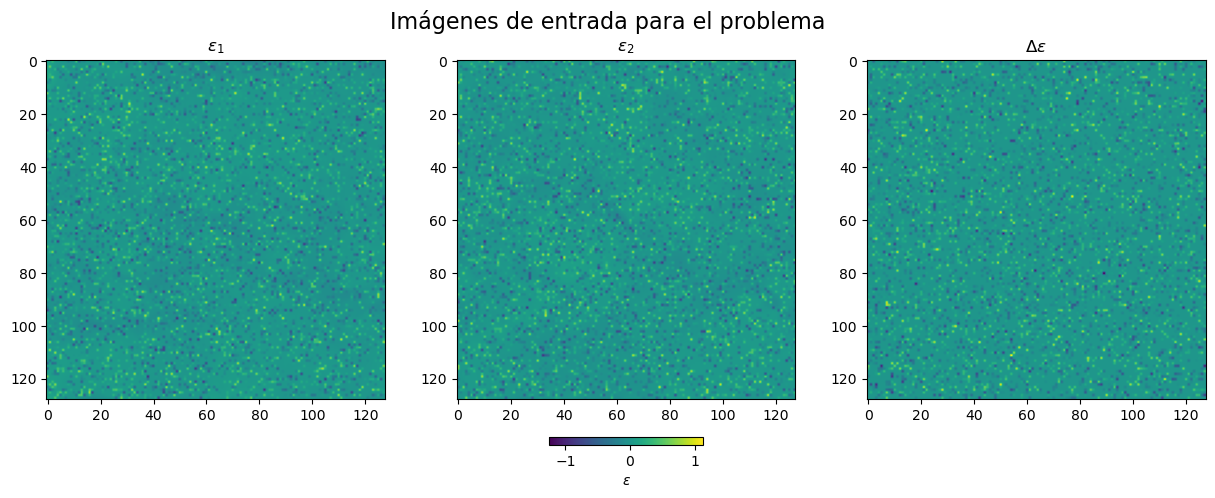

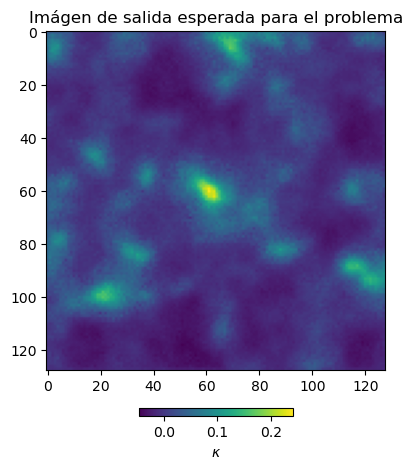

In [6]:
dataset_number = "test_public"

EP_pth = glob.glob(f"dataset/test_public/*.npy")[0]
KA_pth = glob.glob(f"submission/unet-20-epochs-best-model/purrfectpredict/*.npy")[0]

EP = np.load(EP_pth)
KA = np.load(KA_pth)

print(f"Shape de imágen epsilon: {EP.shape} max: {EP.max()} min: {EP.min()}")
print(f"Shape de imágen kappa: {KA.shape}")

plot_epsilon(EP)
plot_kappa(KA)

In [ ]:
dataset_number = 1

EP_pths = glob.glob(f"{dataset_number}/EPSILON/*.npy")
KA_pths = glob.glob(f"{dataset_number}/KAPPA/*.npy")

ep_mins = []
ep_maxs = []
ka_mins = []
ka_maxs = []
i = 0
for EP_pth, KA_pth in zip(EP_pths, KA_pths):
    EP = np.load(EP_pth)
    KA = np.load(KA_pth)
    ep_mins.append(EP.min())
    ep_maxs.append(EP.max())
    ka_mins.append(KA.min())
    ka_maxs.append(KA.max())
    i += 1
    if i > 100000:
      break


In [ ]:
print("ep min:", min(ep_mins))
print("ep max:", max(ep_maxs))
print("ka min:", min(ka_mins))
print("ka max:", max(ka_maxs))

ep min: -1.843
ep max: 1.765
ka min: -0.0924
ka max: 0.8716


Luego cargaremos y visualizaremos las imágenes:

In [ ]:
dataset_number = 1

EP_pth = glob.glob(f"{dataset_number}/EPSILON/*.npy")[0]
KA_pth = glob.glob(f"{dataset_number}/KAPPA/*.npy")[0]

EP_pth, KA_pth
EP = np.load(EP_pth)
KA = np.load(KA_pth)

print(f"Shape de imágen epsilon: {EP.shape} max: {EP.max()} min: {EP.min()}")
print(f"Shape de imágen kappa: {KA.shape}")

#plot_epsilon(EP)
#plot_kappa(KA)

Shape de imágen epsilon: (3, 128, 128) max: 1.033203125 min: -1.2802734375
Shape de imágen kappa: (128, 128)


## Links de descarga
Para acceder a los datos existen 9 links en total, los 8 de entrenamiento y el de validación.

A continuación se dejan los links en una lista para que tengan fácil acceso a ellos:
- Entrenamiento:
    1. https://descargas.inf.santiago.usm.cl/train/1.tar.gz
    2. https://descargas.inf.santiago.usm.cl/train/2.tar.gz
    3. https://descargas.inf.santiago.usm.cl/train/3.tar.gz
    4. https://descargas.inf.santiago.usm.cl/train/4.tar.gz
    5. https://descargas.inf.santiago.usm.cl/train/5.tar.gz
    6. https://descargas.inf.santiago.usm.cl/train/6.tar.gz
    7. https://descargas.inf.santiago.usm.cl/train/7.tar.gz
    8. https://descargas.inf.santiago.usm.cl/train/8.tar.gz
- Validación:
    - https://descargas.inf.santiago.usm.cl/test_public.tar.gz

Métricas

In [ ]:
import numpy as np
import torch
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max

# ======= Metric used for scoring in the challenge ========

def WMAPE(T:torch.Tensor, P:torch.Tensor, delta = torch.tensor(1e-5)):
    T = torch.where(T == 0.0, delta, T)
    P = torch.where(P == 0.0, delta, P)
    W_fun = lambda T, max_T: 1 + (T/max_T)
    max_T = torch.max(T)
    W = W_fun(T, max_T)
    Numerator = W*(torch.abs(P-T)/torch.abs(T))
    sum_W = torch.sum(W)
    sum_Numerator = torch.sum(Numerator)
    return sum_Numerator/sum_W

def DICE_binary_mask(Tensor:torch.tensor):
    Tensor_mask = Tensor - torch.mean(Tensor)
    Tensor_mask[torch.where(Tensor_mask > 0)] = 1
    Tensor_mask[torch.where(Tensor_mask <= 0)] = 0
    return Tensor_mask

def DICEE(T:torch.Tensor, P:torch.Tensor, alpha:float = 0.5, beta:float = 0.5):
  if T.shape != P.shape: return None
  G = DICE_binary_mask(T)
  A = DICE_binary_mask(P)
  sum_G_A = torch.sum(G*A)
  sum_alpha = torch.sum(A*(1-G))
  sum_beta = torch.sum(G*(1-A))
  return 1-(sum_G_A/(sum_G_A + alpha*sum_alpha + beta*sum_beta))

def find_top_k_peaks(im ,sigma=3, N=3):
    smoothed = gaussian_filter(im, sigma=sigma)
    coordinates = peak_local_max(smoothed,threshold_abs=None, num_peaks=N)
    while len(coordinates) < 3: coordinates = np.vstack([coordinates,np.array([0,0])])
    return coordinates

def DPEAKS(T:np.ndarray, P:np.ndarray, num_peaks = 3):
    PEAKS_T = find_top_k_peaks(T, N=num_peaks)
    PEAKS_P = find_top_k_peaks(P, N=num_peaks)
    sum_DPEAKS = np.sum(np.abs(PEAKS_T-PEAKS_P))
    return sum_DPEAKS
class MetricAccumulator():
    def __init__(self,metrics:dict):
        self.metrics = metrics
        self.reset()
    def reset(self):
        self.values = {metric_name: [] for metric_name in self.metrics.keys()}
    def update(self,T:torch.Tensor, P:torch.Tensor):
        for metric_name, metric_fun in self.metrics.items():
            for i in range(T.shape[0]): #assume is in batches
              self.values[metric_name].append(metric_fun(T[i],P[i]))
    def get_metrics(self):
        return {metric_name: np.mean(metric_values) for metric_name, metric_values in self.values.items()}
    def get_metrics_str(self):
        return " ".join([f"{metric_name}: {metric_value:.4f}" for metric_name, metric_value in self.get_metrics().items()])

## Baseline model

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
class TransConvConvBlock(nn.Module):
  def __init__(self,kernel_size=49,channels=8):
    super(TransConvConvBlock, self).__init__()
    padding = (kernel_size -1)//2
    self.transconvconv = nn.Sequential(
        nn.ConvTranspose2d(in_channels=channels, out_channels=channels, kernel_size=kernel_size, padding=padding),
        nn.Tanh(),
        nn.Conv2d(in_channels=channels, out_channels=channels, kernel_size=kernel_size, padding=padding),
        nn.Tanh(),
    )
  def forward(self,x,skip=None):
    return self.transconvconv(x)
class TransConvConvSkippedBlock(nn.Module):
  def __init__(self,kernel_size=49,channels=8):
    super(TransConvConvSkippedBlock, self).__init__()
    padding = (kernel_size - 1)//2
    self.transconvconv = TransConvConvBlock(kernel_size=kernel_size,channels=channels)
    self.bn = nn.BatchNorm2d(channels)
  def forward(self,x):
    return self.bn(self.transconvconv(x)*x)

class CustomResNet(nn.Module):
    def __init__(self):
        super(CustomResNet, self).__init__()
        self.seq1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1), # Conv2D-1: (3x3) -> (8, 128, 128) since we are maintaining the same input size
            nn.Tanh(),
            TransConvConvSkippedBlock(),
        )
        self.seq2 = nn.Sequential(
            TransConvConvSkippedBlock(),
            TransConvConvSkippedBlock(),
            TransConvConvBlock()
        )
        self.bn = nn.BatchNorm2d(8)


        self.output = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8, out_channels=16, kernel_size=49, padding=24),
            nn.Tanh(),
            nn.Conv2d(in_channels=16, out_channels=1, kernel_size=49, padding=24),
            nn.ReLU(),
        )

    def forward(self, x):
        x1 = self.seq1(x)
        x2 = self.seq2(x1)
        x3 = self.bn(x1*x2)
        return self.output(x3)



In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the double convolution block
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

# Define the U-Net model
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        # Encoder
        self.encoder1 = DoubleConv(in_channels, 64)
        self.encoder2 = DoubleConv(64, 128)
        self.encoder3 = DoubleConv(128, 256)
        self.encoder4 = DoubleConv(256, 512)

        # Bottleneck
        self.bottleneck = DoubleConv(512, 1024)

        # Decoder
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4 = DoubleConv(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = DoubleConv(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = DoubleConv(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = DoubleConv(128, 64)

        # Final output layer
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.encoder1(x)
        e2 = self.encoder2(F.max_pool2d(e1, 2))
        e3 = self.encoder3(F.max_pool2d(e2, 2))
        e4 = self.encoder4(F.max_pool2d(e3, 2))

        # Bottleneck
        b = self.bottleneck(F.max_pool2d(e4, 2))

        # Decoder with skip connections
        d4 = self.upconv4(b)
        d4 = torch.cat((e4, d4), dim=1)
        d4 = self.decoder4(d4)

        d3 = self.upconv3(d4)
        d3 = torch.cat((e3, d3), dim=1)
        d3 = self.decoder3(d3)

        d2 = self.upconv2(d3)
        d2 = torch.cat((e2, d2), dim=1)
        d2 = self.decoder2(d2)

        d1 = self.upconv1(d2)
        d1 = torch.cat((e1, d1), dim=1)
        d1 = self.decoder1(d1)

        # Final output
        out = self.final_conv(d1)
        return out

## Dataset

In [ ]:
import os
import glob
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class EPKADataset(Dataset):
    def __init__(self, dataset_numbers, transform=None):
        """
        Args:
            dataset_numbers (list): List of dataset numbers to load (e.g., [1, 2, 3, ..., 8])
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataset_numbers = dataset_numbers
        self.transform = transform
        self.data_pairs = self.load_data_paths()

    def load_data_paths(self):
        data_pairs = []
        # Loop over the dataset numbers to get paths for all datasets
        for dataset_number in self.dataset_numbers:
            EP_paths = glob.glob(f"dataset/{dataset_number}/EPSILON/*.npy")
            KA_paths = glob.glob(f"dataset/{dataset_number}/KAPPA/*.npy")
            # Pair corresponding files from EPSILON and KAPPA folders
            for EP_pth, KA_pth in zip(EP_paths, KA_paths):
                data_pairs.append((EP_pth, KA_pth))
        return data_pairs

    def __len__(self):
        return len(self.data_pairs)

    def __getitem__(self, idx):
        # Load input (epsilon) and target (kappa) data
        EP_pth, KA_pth = self.data_pairs[idx]
        EP = np.load(EP_pth)  # Input
        KA = np.load(KA_pth)  # Target

        # Convert numpy arrays to PyTorch tensors
        EP = torch.from_numpy(EP).float()  # Convert to float tensor
        KA = torch.from_numpy(KA).unsqueeze(0).float()  # Convert to float tensor

        # Check if the transform is provided
        if self.transform:
            EP = self.transform(EP)
            KA = self.transform(KA)

        return EP, KA

## Funciones para entrenar y validar

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from tqdm import tqdm  # Progress bar

# Focal Loss class (same as before)
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean()

# Combined train/validate function with progress bar
def train_validate(model, loader, criterion, optimizer=None, epoch=None, metric_accumulator=None):
    """
    Train or validate the model depending on whether an optimizer is provided, with a progress bar.

    Args:
        model (nn.Module): The model to be trained or validated.
        loader (DataLoader): DataLoader for the training/validation data.
        criterion (nn.Module): The loss function (Focal Loss).
        optimizer (torch.optim.Optimizer or None): Optimizer for training. If None, the function only validates.
        epoch (int or None): Current epoch number for display (optional).
        metric_accumulator (dict or None): Dictionary with metrics functions to be used for validation

    Returns:
        avg_loss (float): The average loss over the dataset.
    """
    if optimizer:
        model.train()  # Set the model to training mode
        mode = 'Train'
    else:
        model.eval()  # Set the model to evaluation mode
        mode = 'Validate'
    if metric_accumulator:
      metric_accumulator.reset()

    total_loss = 0.0

    # Create a progress bar for the loop
    loop = tqdm(enumerate(loader), desc=f'{mode} Epoch {epoch}', leave=False, total=len(loader))

    # Disable gradient calculation for validation
    with torch.set_grad_enabled(optimizer is not None):
        for i,(inputs, targets) in loop:
            #print(f"Batch {i+1}/{len(loader)}")
            # Move data to the device (GPU if available)
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            #print("antes forward")
            outputs = model(inputs)
            #print("despues forward")
            loss = criterion(outputs, targets)
            if metric_accumulator:
              metric_accumulator.update(targets.squeeze(1).detach().cpu(), outputs.squeeze(1).detach().cpu())
            # Backward pass and optimization (if training)
            if optimizer:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()


            # Accumulate the loss
            total_loss += loss.item()
            # Update progress bar description with current loss
            loop.set_postfix(loss=loss.item())

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(loader)
    if metric_accumulator:
      print(f"{mode} Epoch {epoch}: Loss: {avg_loss:.6f} {metric_accumulator.get_metrics_str()}")
    else:
      print(f"{mode} Epoch {epoch}: Loss: {avg_loss:.6f}")
    return avg_loss

# Main function for the training process
def train_model(model, train_loader, val_loader, num_epochs=10, lr=0.001, gamma=2.0, alpha=0.25):
    """
    Train and validate the model using Adam optimizer and Focal Loss.

    Args:
        model (nn.Module): The model to be trained.
        train_loader (DataLoader): DataLoader for the training data.
        val_loader (DataLoader): DataLoader for the validation data.
        num_epochs (int): Number of epochs to train the model.
        lr (float): Learning rate for the Adam optimizer.
        gamma (float): Focal loss gamma parameter.
        alpha (float): Focal loss alpha parameter.

    Returns:
        None
    """
    # Define Adam optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Define Focal Loss
    criterion = torch.nn.MSELoss()

    metric_accumulator = MetricAccumulator({
        "WMAPE": WMAPE,
        "DICE": DICEE,
        "DPEAKS": DPEAKS,
    })
    best_loss = float('inf')
    # Loop through epochs
    for epoch in range(1, num_epochs + 1):
        print(f"Epoch [{epoch}/{num_epochs}]")

        # Train the model
        train_validate(model, train_loader, criterion, optimizer, epoch,metric_accumulator)

        # Validate the model
        validate_loss = train_validate(model, val_loader, criterion, epoch=epoch,metric_accumulator=metric_accumulator)
        if validate_loss <= best_loss:
          torch.save(model.state_dict(), "best_model.pth")
          print("Saving best model")
          best_loss = validate_loss
        torch.save(model.state_dict(), "last_model.pth")

    print("Training complete.")

In [ ]:
from torch.utils.data import random_split

In [ ]:
# Example usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Example usage
total_dataset = EPKADataset([1])
generator1 = torch.Generator().manual_seed(42)
train_dataset, val_dataset,_ = random_split(total_dataset, [0.1,0.025,0.875], generator=generator1)
# Creating a DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Move the model to the device (GPU if available)
model = UNet( 3, 1)
model = model.to(device)


In [ ]:
len(train_dataset)

7719

In [ ]:
train_model(model, train_loader, val_loader, num_epochs=10, lr=0.00001)

Epoch [1/10]


Train Epoch 1: Loss: 0.0499 WMAPE: 56.9275 DICE: 0.5456 DPEAKS: 227.6251


Validate Epoch 1: Loss: 0.0090 WMAPE: 23.3679 DICE: 0.5456 DPEAKS: 217.7833
Epoch [2/10]


Train Epoch 2: Loss: 0.0043 WMAPE: 14.7957 DICE: 0.5443 DPEAKS: 219.8040


Validate Epoch 2: Loss: 0.0028 WMAPE: 10.5819 DICE: 0.5431 DPEAKS: 225.8802
Epoch [3/10]


Train Epoch 3: Loss: 0.0023 WMAPE: 9.4029 DICE: 0.5411 DPEAKS: 215.2423


Validate Epoch 3: Loss: 0.0021 WMAPE: 7.8597 DICE: 0.5414 DPEAKS: 223.4137
Epoch [4/10]


Train Epoch 4: Loss: 0.0018 WMAPE: 7.5996 DICE: 0.5292 DPEAKS: 195.1561


Validate Epoch 4: Loss: 0.0017 WMAPE: 7.0933 DICE: 0.5154 DPEAKS: 187.3608
Epoch [5/10]


Train Epoch 5: Loss: 0.0015 WMAPE: 6.7032 DICE: 0.5109 DPEAKS: 180.8397


Validate Epoch 5: Loss: 0.0014 WMAPE: 5.8940 DICE: 0.5108 DPEAKS: 179.6791
Epoch [6/10]


Train Epoch 6: Loss: 0.0013 WMAPE: 6.1582 DICE: 0.4913 DPEAKS: 168.4375


Validate Epoch 6: Loss: 0.0012 WMAPE: 5.8614 DICE: 0.4778 DPEAKS: 164.1146
Epoch [7/10]


Train Epoch 7: Loss: 0.0011 WMAPE: 5.7946 DICE: 0.4728 DPEAKS: 158.4451


Validate Epoch 7: Loss: 0.0011 WMAPE: 5.4431 DICE: 0.4741 DPEAKS: 157.9373
Epoch [8/10]


Train Epoch 8: Loss: 0.0010 WMAPE: 5.5554 DICE: 0.4527 DPEAKS: 152.1792


Validate Epoch 8: Loss: 0.0010 WMAPE: 5.1175 DICE: 0.4696 DPEAKS: 157.5677
Epoch [9/10]


Train Epoch 9: Loss: 0.0009 WMAPE: 5.4705 DICE: 0.4324 DPEAKS: 147.3190


Validate Epoch 9: Loss: 0.0009 WMAPE: 5.6090 DICE: 0.4167 DPEAKS: 151.2530
Epoch [10/10]


Train Epoch 10: Loss: 0.0008 WMAPE: 5.4359 DICE: 0.4133 DPEAKS: 142.8853


Validate Epoch 10: Loss: 0.0009 WMAPE: 6.1288 DICE: 0.3898 DPEAKS: 151.1757
Training complete.


In [ ]:
torch.save(model.state_dict(), "last_10_epoch.pth")

In [ ]:
model.load_state_dict(torch.load("last_10_epoch.pth"))

/tmp/ipykernel_52897/4197701000.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("last_10_epoch.pth"))


<All keys matched successfully>

In [ ]:
train_model(model, train_loader, val_loader, num_epochs=10, lr=0.00001)

Epoch [1/10]


Train Epoch 1: Loss: 0.0007 WMAPE: 5.3754 DICE: 0.3781 DPEAKS: 136.0026


Validate Epoch 1: Loss: 0.0007 WMAPE: 5.5114 DICE: 0.3660 DPEAKS: 146.5982
Epoch [2/10]


Train Epoch 2: Loss: 0.0006 WMAPE: 5.2849 DICE: 0.3351 DPEAKS: 131.7855


Validate Epoch 2: Loss: 0.0006 WMAPE: 5.3870 DICE: 0.3355 DPEAKS: 141.3561
Epoch [3/10]


Train Epoch 3: Loss: 0.0005 WMAPE: 4.9716 DICE: 0.3074 DPEAKS: 127.2331


Validate Epoch 3: Loss: 0.0007 WMAPE: 5.4226 DICE: 0.3284 DPEAKS: 141.8263
Epoch [4/10]


Train Epoch 4: Loss: 0.0005 WMAPE: 4.6229 DICE: 0.2890 DPEAKS: 122.7272


Validate Epoch 4: Loss: 0.0006 WMAPE: 5.3157 DICE: 0.3129 DPEAKS: 138.3546
Epoch [5/10]


Train Epoch 5: Loss: 0.0004 WMAPE: 4.4171 DICE: 0.2767 DPEAKS: 120.0509


Validate Epoch 5: Loss: 0.0007 WMAPE: 5.1667 DICE: 0.3114 DPEAKS: 136.6133
Epoch [6/10]


Train Epoch 6: Loss: 0.0004 WMAPE: 4.3245 DICE: 0.2676 DPEAKS: 115.9166


Validate Epoch 6: Loss: 0.0006 WMAPE: 5.2900 DICE: 0.3045 DPEAKS: 136.8243
Epoch [7/10]


Train Epoch 7: Loss: 0.0004 WMAPE: 4.2162 DICE: 0.2599 DPEAKS: 112.1218


Validate Epoch 7: Loss: 0.0006 WMAPE: 4.7937 DICE: 0.3044 DPEAKS: 133.9907
Epoch [8/10]


Train Epoch 8: Loss: 0.0004 WMAPE: 4.1545 DICE: 0.2527 DPEAKS: 107.9909


Validate Epoch 8: Loss: 0.0006 WMAPE: 4.5799 DICE: 0.3058 DPEAKS: 135.7600
Epoch [9/10]


Train Epoch 9: Loss: 0.0004 WMAPE: 4.1086 DICE: 0.2462 DPEAKS: 104.1123


Validate Epoch 9: Loss: 0.0006 WMAPE: 4.9425 DICE: 0.3005 DPEAKS: 135.0057
Epoch [10/10]


Train Epoch 10: Loss: 0.0003 WMAPE: 4.0053 DICE: 0.2409 DPEAKS: 100.8467


Validate Epoch 10: Loss: 0.0006 WMAPE: 4.9486 DICE: 0.3004 DPEAKS: 135.2789
Training complete.


In [ ]:
dataset_2 = EPKADataset([2])
generator2 = torch.Generator().manual_seed(42)
dataset_2,_ = random_split(total_dataset, [0.2,.8], generator=generator2)
# Creating a DataLoader for batch processing
loader_2 = DataLoader(dataset_2, batch_size=32, shuffle=False)

In [ ]:
len(dataset_2),len(loader_2)

(15436, 483)

In [ ]:
metric_accumulator = MetricAccumulator({
        "WMAPE": WMAPE,
        "DICE": DICEE,
        "DPEAKS": DPEAKS,
    })

criterion = torch.nn.MSELoss()
model.load_state_dict(torch.load("best_model.pth"))
train_validate(model, loader_2, criterion ,metric_accumulator=metric_accumulator)

/tmp/ipykernel_52897/4272612626.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))
                                     

Validate Epoch None: Loss: 0.0005 WMAPE: 4.2712 DICE: 0.2775 DPEAKS: 121.0785


0.0004580556921174993

In [ ]:
# Test the model with random input

input_tensor = torch.randn(1, 3, 128, 128)  # Batch size of 1, input shape (3, 128, 128)
output = model(input_tensor)

print("Output shape:", output.shape)


Output shape: torch.Size([1, 1, 128, 128])


In [ ]:
input_tensor.squeeze().numpy()

array([[[-0.50378036,  0.4440043 ,  0.667676  , ...,  0.25913078,
          0.10354525,  1.7031912 ],
        [ 1.7688512 , -0.32242262, -1.1897115 , ...,  2.6362836 ,
          0.34611207,  0.8614362 ],
        [-0.3532252 ,  0.44035357,  1.0249743 , ..., -1.0886933 ,
          0.33358833, -0.42824802],
        ...,
        [-0.9671758 ,  0.38950497, -0.911639  , ..., -0.42441028,
         -2.1810029 , -0.36213884],
        [ 0.8257088 ,  0.58302855,  1.3586984 , ...,  0.18944475,
          0.6291018 , -0.35271618],
        [ 1.3864833 ,  1.1240964 , -1.5259975 , ..., -0.36486462,
          0.38949615,  0.7714725 ]],

       [[-1.4356071 , -0.41684288,  0.31928256, ..., -1.1530994 ,
         -0.16224752,  1.0491717 ],
        [ 1.5161132 ,  1.776064  , -0.2938499 , ..., -0.12988114,
         -0.93007183,  0.8609551 ],
        [ 1.0354438 ,  0.0789392 ,  0.14908825, ..., -1.1199309 ,
         -1.0277202 ,  0.13924792],
        ...,
        [-0.62236303, -2.2315848 ,  0.21872592, ..., -

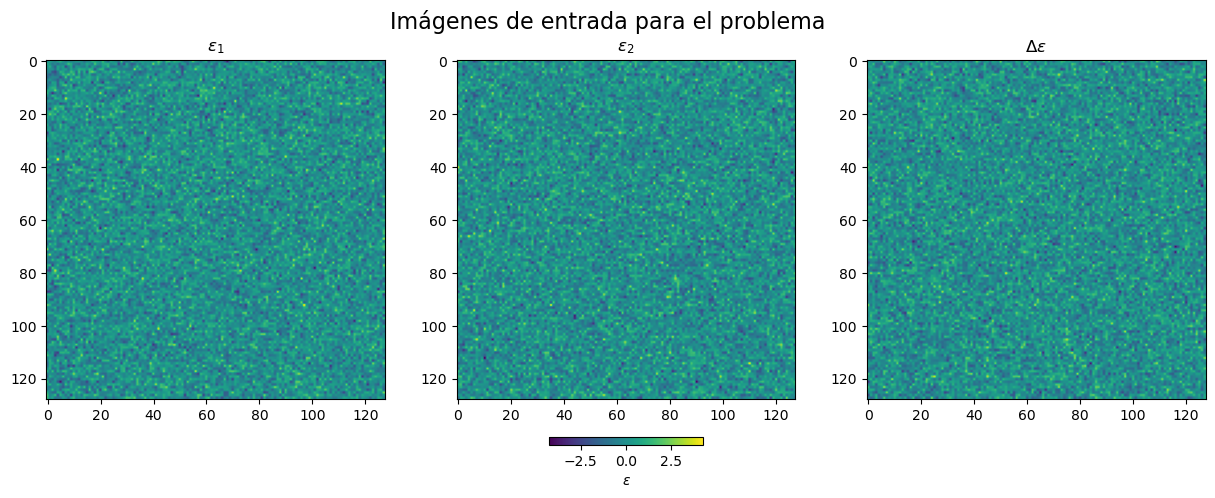

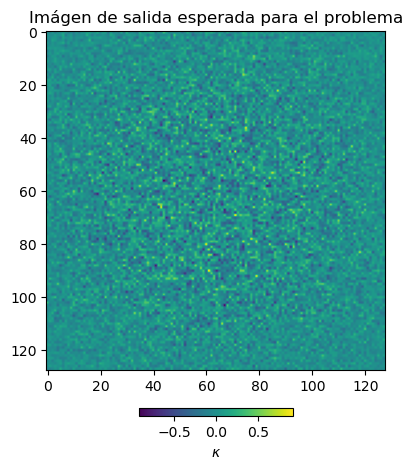

In [ ]:
plot_epsilon(input_tensor.squeeze().numpy())
plot_kappa(model(input_tensor).squeeze().detach().numpy())

In [ ]:
import os
def create_submission(model, submission_name):
  model.eval()
  #crea carpeta submission/submission_name/purrfectpredict
  os.makedirs(f"submission/{submission_name}/purrfectpredict", exist_ok=True)
  #crea un dataloader con los
  inputs = glob.glob(f"dataset/test_public/*.npy")
  loop = tqdm(inputs, desc=f'Create submission total its {len(inputs)}', leave=False)
  #evala el modelo y crea un archivo .npy por cada prediccion del modelo, el nombre del archivo .npy debe ser el mismo que del archivo de input
  with torch.no_grad():
    for input in loop:
      input_tensor = torch.from_numpy(np.load(input)).to(device).unsqueeze(0).float()
      output = model(input_tensor)
      np.save(f"submission/{submission_name}/purrfectpredict/{input.split('/')[-1]}", output.squeeze().detach().cpu().numpy())
  #comprimir usando 7zip la carpeta submission/{submission_name}/purrfectpredict con zip, creando un archivo purrfectpredict_submission.zip en la carpeta submission/{submission_name}


In [ ]:
test_model = UNet( 3, 1)
test_model.load_state_dict(torch.load("best_model.pth",weights_only=True))
test_model = test_model.to(device)
create_submission(test_model, submission_name="unet-20-epochs-best-model")

/tmp/ipykernel_52897/3671128486.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_model.load_state_dict(torch.load("best_model.pth"))


In [ ]:
submission_name="unet-20-epochs-best-model"
os.system(f"7zz a -tzip submission/{submission_name}/purrfectpredict_submission.zip submission/{submission_name}/purrfectpredict")


7-Zip (z) 24.08 (x64) : Copyright (c) 1999-2024 Igor Pavlov : 2024-08-11
 64-bit locale=en_US.UTF-8 Threads:16 OPEN_MAX:4096, ASM

Scanning the drive:
1 folder, 76522 files, 5024740608 bytes (4792 MiB)

Creating archive: submission/unet-20-epochs-best-model/purrfectpredict_submission.zip

Add new data to archive: 1 folder, 76522 files, 5024740608 bytes (4792 MiB)


Files read from disk: 76522
Archive size: 4643151301 bytes (4429 MiB)
Everything is Ok


0

In [18]:
#visualizacion soluciones
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset_number = 3
valid_model = UNet( 3, 1)
valid_model.load_state_dict(torch.load("best_model.pth",weights_only=True))
valid_model = valid_model.to(device)
inputs = glob.glob(f"dataset/{dataset_number}/EPSILON/*.npy")
targets = glob.glob(f"dataset/{dataset_number}/KAPPA/*.npy")

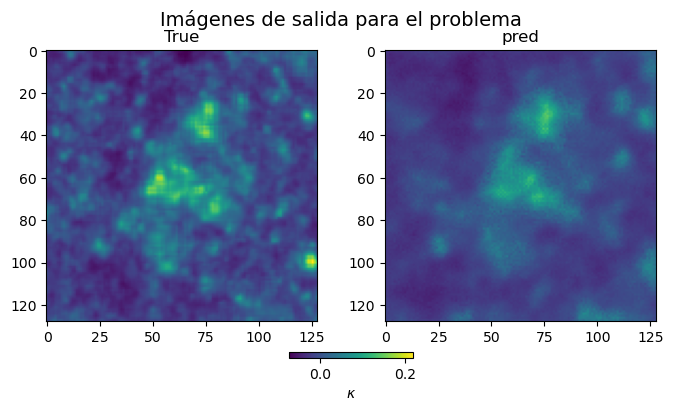

In [62]:
i = 25
input = np.load(inputs[i])
target = np.load(targets[i])
valid_model.eval()
with torch.no_grad():
  input_tensor = torch.from_numpy(input).to(device).unsqueeze(0).float()
  output = valid_model(input_tensor)
  pred = output.squeeze().detach().cpu().numpy()
  #plot_epsilon(input)
  plot_kappas(target,pred)

In [17]:
inputs

[]